In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data 

dunking_data = pd.read_csv('data/dunking-data.csv')
microscopy_data = pd.read_csv('data/microscopy-data.csv')
tr1_data = pd.read_csv('data/tr-1.csv')
tr2_data = pd.read_csv('data/tr-2.csv')
tr3_data = pd.read_csv('data/tr-3.csv')

# Constants
tea_surface_tension = 6.78e-2  # N m−1
contact_angle = 1.45  # rad
tea_dynamic_viscosity = 9.93e-4  # Pa s

tr1_data['eta'] = tea_dynamic_viscosity
tr1_data['gamma'] = tea_surface_tension
tr1_data['phi'] = contact_angle

tr2_data['eta'] = tea_dynamic_viscosity
tr2_data['gamma'] = tea_surface_tension
tr2_data['phi'] = contact_angle

tr3_data['eta'] = tea_dynamic_viscosity
tr3_data['gamma'] = tea_surface_tension
tr3_data['phi'] = contact_angle

## Microscopy data is a subset of Dunking data
# Check similar entries in the datasets 

In [67]:
# Merge the two dataframes on the common columns
microscopy_labeled = pd.merge(dunking_data, microscopy_data, on=['L', 'eta', 'phi', 't', 'gamma'])
microscopy_labeled 

,gamma,phi,eta,L,t,biscuit,r
0,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07
1,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07
2,0.062276,1.520534,0.001005,0.004030,28.423407,Hobnob,3.639434e-07
3,0.075264,1.487706,0.001003,0.004726,21.984085,Rich Tea,3.198697e-07
4,0.073130,1.554126,0.000995,0.002234,27.632784,Rich Tea,2.973448e-07
...,...,...,...,...,...,...,...
495,0.070954,1.447903,0.000996,0.005560,17.524261,Hobnob,4.176549e-07
496,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07
497,0.071658,1.303051,0.001003,0.008497,24.070251,Rich Tea,3.194081e-07
498,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,7.453712e-07


biscuit
Digestive    1000
Hobnob       1000
Rich Tea     1000
Name: count, dtype: int64


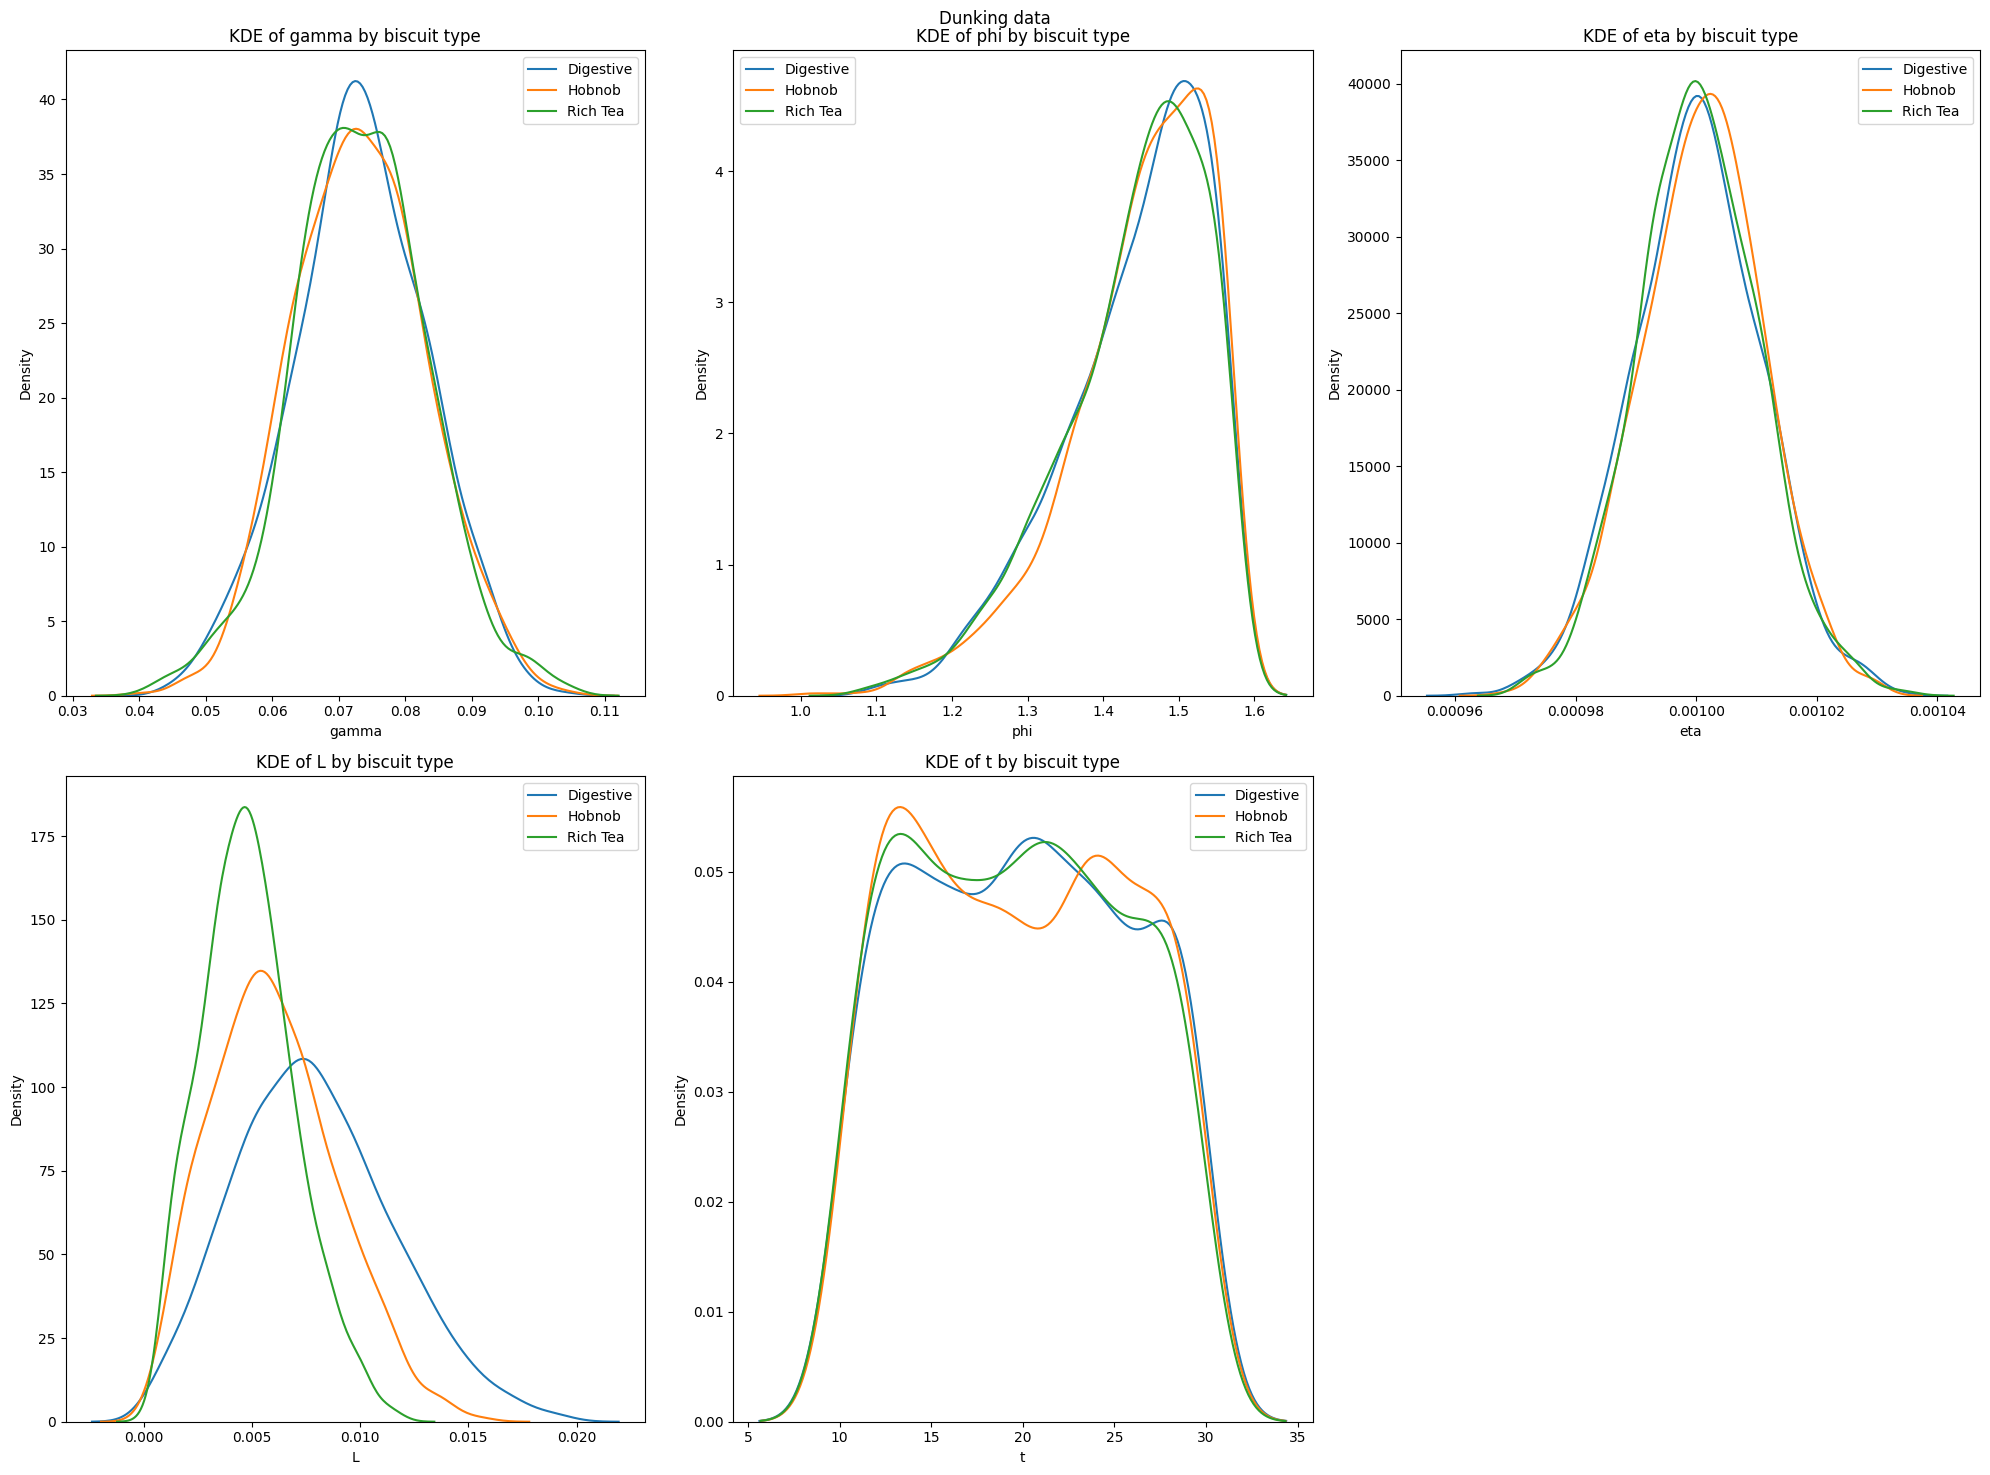

In [68]:
# Check the number of biscuits in each type from dunking_data
biscuit_counts = dunking_data['biscuit'].value_counts()
print(biscuit_counts)

# Get the list of numerical columns
num_cols = dunking_data.select_dtypes(include=['float64', 'int64']).columns

# Create a 3x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array to make indexing easier
axs = axs.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(num_cols[:5]):
    for biscuit_type in dunking_data['biscuit'].unique():
        sns.kdeplot(dunking_data[dunking_data['biscuit'] == biscuit_type][col], ax=axs[i], label=biscuit_type)
    axs[i].set_title(f'KDE of {col} by biscuit type')
    axs[i].legend()

# Remove the last (empty) subplot
fig.delaxes(axs[-1])

plt.suptitle("Dunking data")

plt.tight_layout()
plt.show()

biscuit
Rich Tea     169
Digestive    168
Hobnob       163
Name: count, dtype: int64


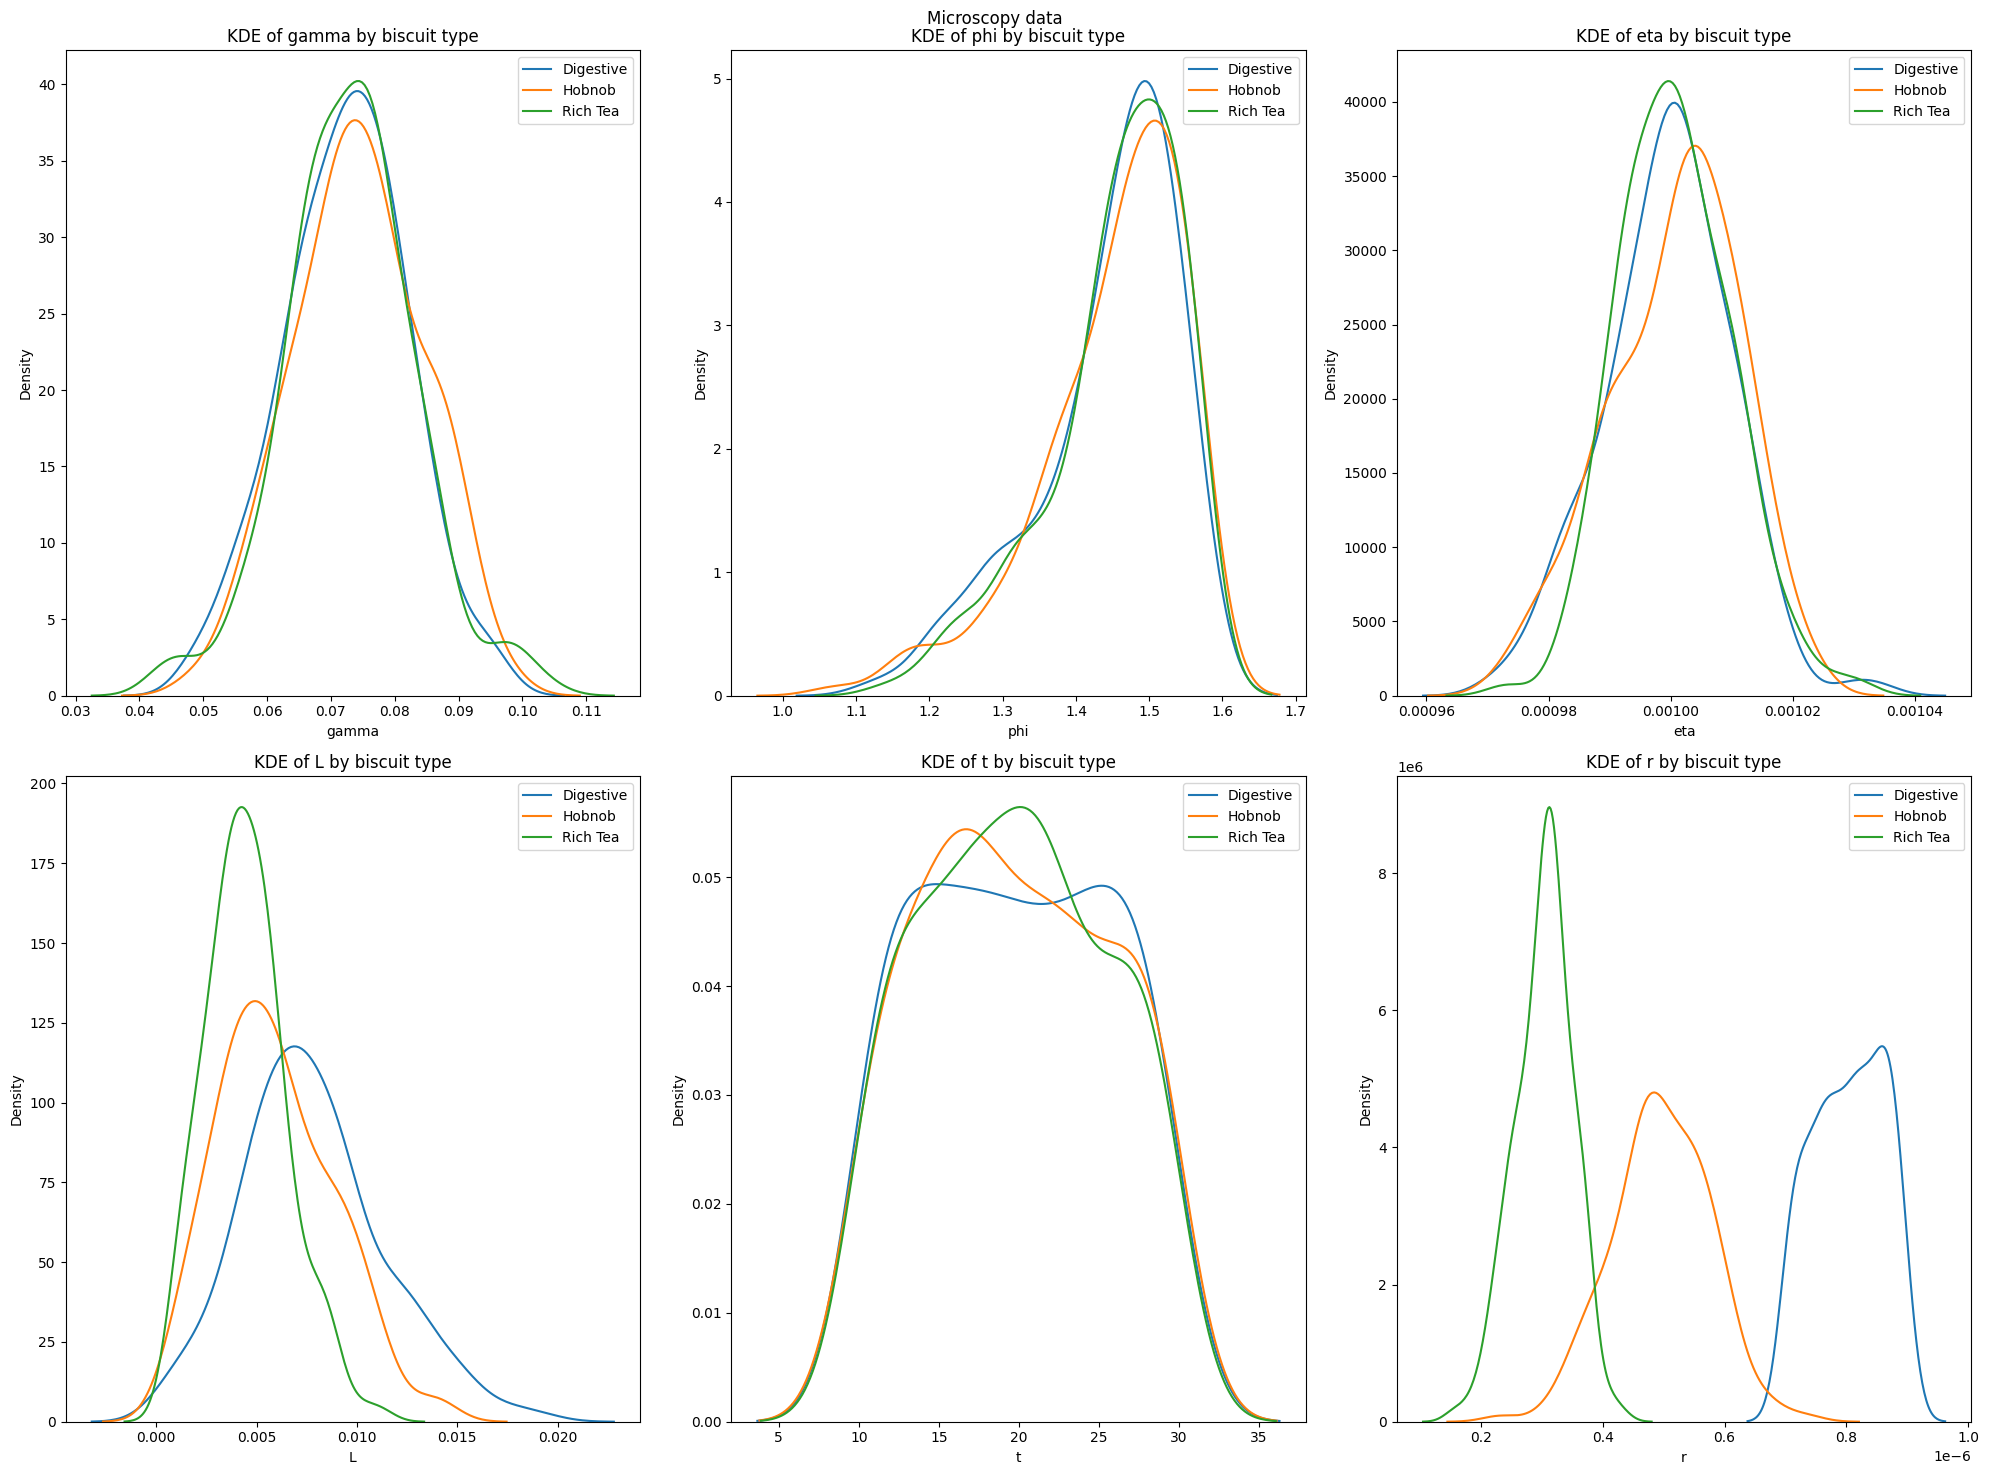

In [69]:
# Check the number of biscuits in each type
biscuit_counts = microscopy_labeled['biscuit'].value_counts()
print(biscuit_counts)

# Get the list of numerical columns
num_cols = microscopy_labeled.select_dtypes(include=['float64', 'int64']).columns

# Create a 3x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array to make indexing easier
axs = axs.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(num_cols):
    for biscuit_type in microscopy_labeled['biscuit'].unique():
        sns.kdeplot(microscopy_labeled[microscopy_labeled['biscuit'] == biscuit_type][col], ax=axs[i], label=biscuit_type)
    axs[i].set_title(f'KDE of {col} by biscuit type')
    axs[i].legend()

plt.suptitle("Microscopy data")
plt.tight_layout()
plt.show()

In [70]:
# Prune outliers on boxplots of radius by biscuit type

def remove_outliers(group):
    Q1 = group['r'].quantile(0.25)
    Q3 = group['r'].quantile(0.75)
    IQR = Q3 - Q1
    mask = (group['r'] >= (Q1 - 1.5 * IQR)) & (group['r'] <= (Q3 + 1.5 * IQR))
    return group[mask]

df_no_outliers = microscopy_labeled.groupby('biscuit').apply(remove_outliers)
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers

,gamma,phi,eta,L,t,biscuit,r
0,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07
1,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07
2,0.070943,1.414721,0.000993,0.007034,11.121606,Digestive,7.930241e-07
3,0.062258,1.377487,0.000996,0.006762,10.031548,Digestive,7.693137e-07
4,0.083265,1.500014,0.001015,0.006188,16.631355,Digestive,8.343526e-07
...,...,...,...,...,...,...,...
489,0.077401,1.499299,0.000993,0.003516,12.019737,Rich Tea,3.704851e-07
490,0.046098,1.562215,0.000987,0.001276,25.022570,Rich Tea,3.284792e-07
491,0.076069,1.392407,0.001009,0.005850,14.213099,Rich Tea,3.485692e-07
492,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07


In [71]:
# How accurate is the Washburn equation? 
# How accurate is the Washburn equation for pore radius estimation?
# Can pore radius be used to determine the biscuit type? 


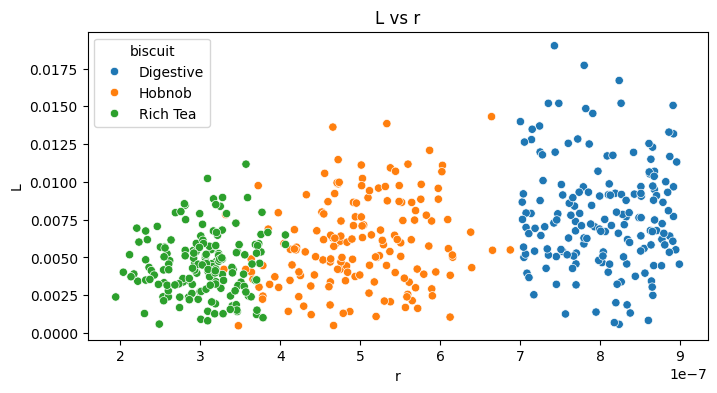

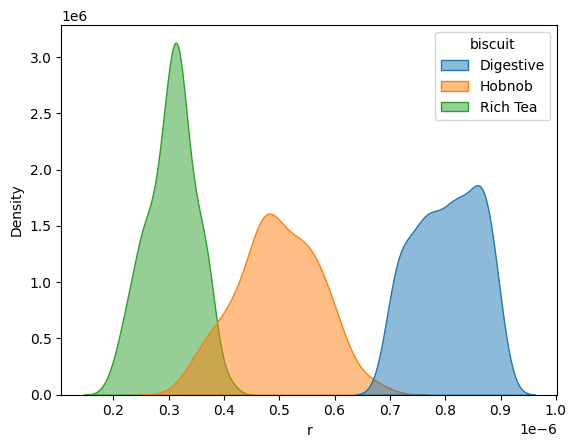

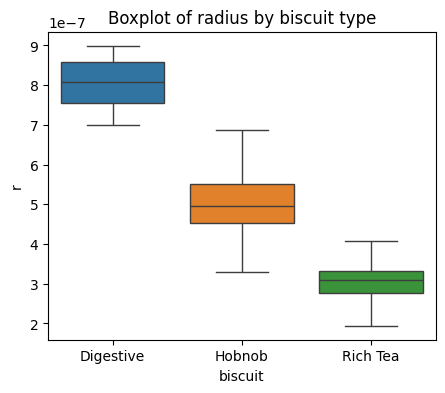

In [72]:
# Plot L vs r by biscuit type

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_no_outliers, x='r', y='L', hue='biscuit')
plt.title('L vs r')
plt.show()

# KDE plot of radius by biscuit type

sns.kdeplot(data=df_no_outliers, x='r', fill=True, levels=5, hue="biscuit", alpha=0.5)

# Boxplot of radius by biscuit type

plt.figure(figsize=(5, 4))
sns.boxplot(data=df_no_outliers, x='biscuit', y='r', hue='biscuit')
plt.title('Boxplot of radius by biscuit type')
plt.show()


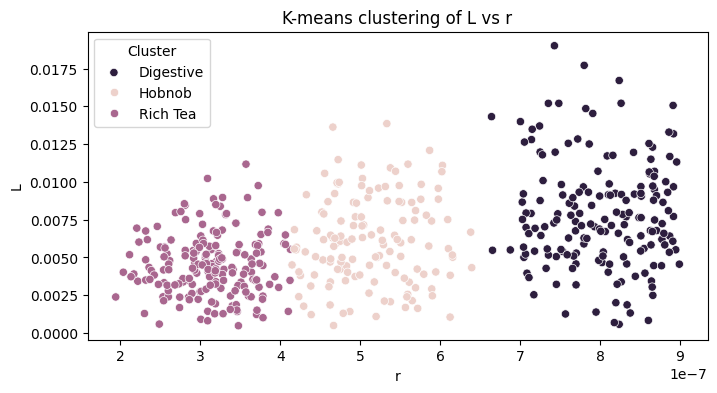

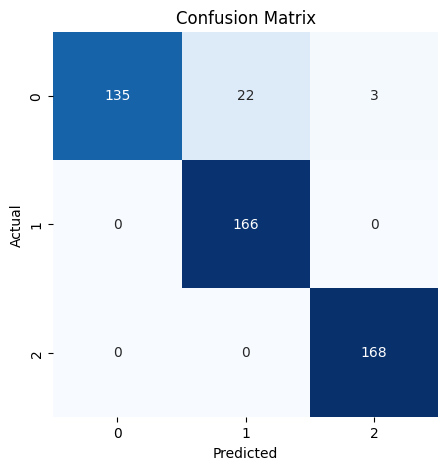

In [73]:
# K-means clustering of the data using 3 clusters 

from sklearn.cluster import KMeans

# Select the columns to cluster on
X = df_no_outliers[['r']]
# Fit KMeans to the data
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0).fit(X)
# Add the cluster labels to the dataframe
df_no_outliers['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_no_outliers, x='r', y='L', hue='cluster')
plt.title('K-means clustering of L vs r')
# Transform labels to biscuit names for better readability
plt.legend(title='Cluster', labels=["Digestive", "Hobnob", "Rich Tea"])
plt.show()

# Compare accuracy of predictions with actual biscuit types

# Create a dictionary to map cluster labels to biscuit types
cluster_to_biscuit = {'Digestive': 2, 'Hobnob': 0, 'Rich Tea': 1}

# Map the cluster labels to biscuit types
df_no_outliers['biscuit_encoded'] = df_no_outliers['biscuit'].map(cluster_to_biscuit)
dunking_data['biscuit_encoded'] = dunking_data['biscuit'].map(cluster_to_biscuit)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(df_no_outliers['biscuit_encoded'], df_no_outliers['cluster'])

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [74]:
dunking_data

,gamma,phi,eta,L,t,biscuit,biscuit_encoded
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive,2
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,2
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,2
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob,0
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob,0
...,...,...,...,...,...,...,...
2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,2
2996,0.067928,1.487239,0.000993,0.003933,12.256570,Hobnob,0
2997,0.059526,1.444489,0.000998,0.007583,26.464108,Hobnob,0
2998,0.071386,1.212213,0.001004,0.013988,22.772293,Digestive,2


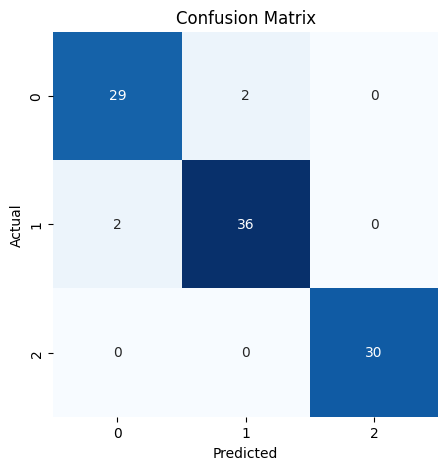

,precision,recall,f1-score,support
0,0.935484,0.935484,0.935484,31.000000
1,0.947368,0.947368,0.947368,38.000000
2,1.000000,1.000000,1.000000,30.000000
accuracy,0.959596,0.959596,0.959596,0.959596
macro avg,0.960951,0.960951,0.960951,99.000000
weighted avg,0.959596,0.959596,0.959596,99.000000


In [185]:
# What about a supervised classifier?

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Define variables 
X = df_no_outliers[['r','L','eta','gamma','phi','t']]
y = df_no_outliers['biscuit_encoded']

#print(X)

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Fit a Random Forest classifier to the training data
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

# Predict the biscuit type for the test data
y_pred = clf_rf.predict(X_test)

# Generate the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report_df



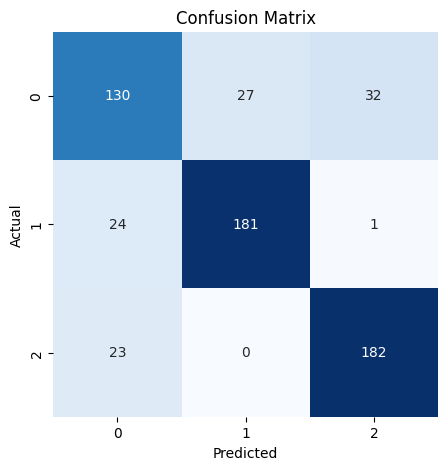

,precision,recall,f1-score,support
0,0.734463,0.687831,0.710383,189.000000
1,0.870192,0.878641,0.874396,206.000000
2,0.846512,0.887805,0.866667,205.000000
accuracy,0.821667,0.821667,0.821667,0.821667
macro avg,0.817056,0.818092,0.817148,600.000000
weighted avg,0.819347,0.821667,0.820091,600.000000


In [76]:
# Can we apply the same classifier to the dunking_data?

X = dunking_data[['L','eta','gamma','phi','t']]
y = dunking_data['biscuit_encoded']

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Fit a Random Forest classifier to the training data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict the biscuit type for the test data
y_pred = clf.predict(X_test)

# Generate the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report_df

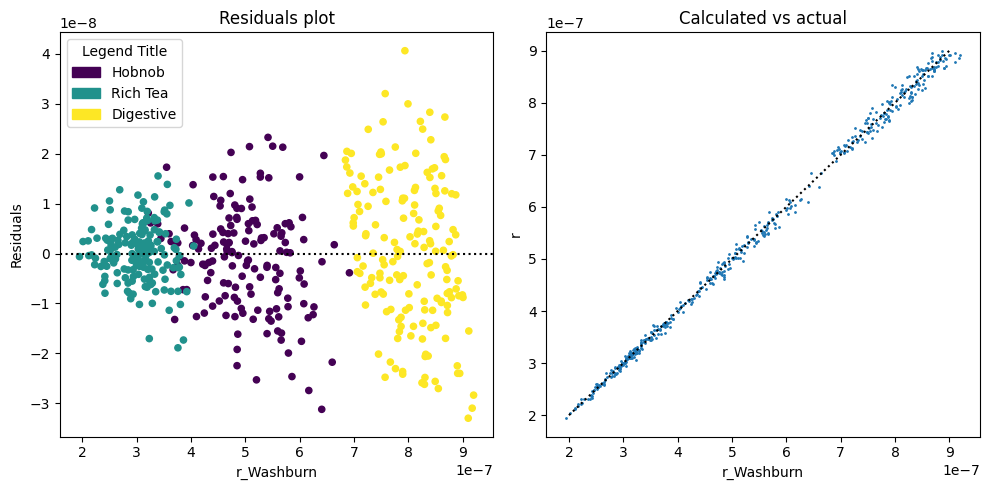

############# Evaluation metrics ###############
model: Washburn
Test size: 494
Correlation coefficient: 0.9986978482539576
Mean Squared Error: 1.210397860071618e-16
R^2 Score: 0.997387911301692
Mean absolute error: 8.293880938206369e-09
Root mean squared error: 1.1001808306235926e-08
Relative absolute error: 0.04351497868222468
Relative root squared error: 0.05110859710760982 

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.034292e-07   2.524111e-10
Hobnob     4.977515e-07  -1.090141e-09
Rich Tea   3.047645e-07   3.080908e-10


In [140]:
# Classification is greatly improved with the addition of r
# Can we use the Washburn equation to calculate r?

import math

def calc_r_washburn(row):
    """
    Calculate r according to Washburn equation
    
    Parameters:
        row - Series representing a row of the dataframe containing L, eta, phi, t, gamma
    """

    L, eta, phi, t, gamma = row["L"], row["eta"], row["phi"], row["t"], row["gamma"]

    r = (2*eta*pow(L,2))/(gamma*t*math.cos(phi))

    return r 

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

def evaluation_metrics(model, y_true, y_pred):

    """
    Calculate the mean squared error and R^2 score of the model.

    Parameters:

    model: model name
    y_true: the true values
    y_pred: the predicted values

    """

    print("############# Evaluation metrics ###############")
    print("model: "+str(model))
    print("Test size: "+str(y_pred.shape[0]))
    # Correlation coefficient
    corr_coef = np.corrcoef(y_true, y_pred)[0, 1]
    print("Correlation coefficient:", corr_coef)

    # Calculate the mean squared error
    mse = mean_squared_error(y_true, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate the R^2 score
    r2 = r2_score(y_true, y_pred)
    print("R^2 Score:", r2)

    # Mean absolute error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    print("Mean absolute error:", mae)

    # Root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print("Root mean squared error:", rmse)

    # Relative absolute error (RAE)
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))
    print("Relative absolute error:", rae)

    # Root relative squared error (RRSE)
    rrse = np.sqrt(np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - np.mean(y_true))))
    print("Relative root squared error:", rrse, "\n")

    return

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_calculated_vs_actual(df, actual_col, pred_col):
    # Calculate residuals
    df['residuals_col'] = df[actual_col] - df[pred_col]
    
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    # Plot the residuals
    df.plot(ax=axs[0], x=pred_col, y='residuals_col', kind='scatter', c=df['biscuit_encoded'], colormap="viridis")
    axs[0].set_xlabel(pred_col)
    axs[0].axhline(y=0.0, color='black', linestyle='dotted')
    axs[0].set_ylabel('Residuals')
    axs[0].set_title('Residuals plot')

    # Remove the colorbar
    cbar = axs[0].collections[0].colorbar
    cbar.remove()

    # Create a legend
    colors = plt.cm.viridis(np.linspace(0, 1, len(legend_labels)))
    patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
    axs[0].legend(handles=patches, title='Legend Title')

    axs[1].set_title("Calculated vs actual")
    df.plot(ax=axs[1], x=pred_col, y=actual_col, kind='scatter', s=1, alpha=1)

    # plot x=y
    axs[1].plot([0.0000002, 0.0000009], [0.0000002, 0.0000009], color='black', linestyle='dotted')

    plt.tight_layout()
    plt.show()
    return

# Plot the residuals 
plot_calculated_vs_actual(df_no_outliers, "r", "r_Washburn")

# Print evaluation metrics 
evaluation_metrics("Washburn", df_no_outliers["r"], df_no_outliers["r_Washburn"])

# Calculate average residuals and average r by biscuit
average_residuals = df_no_outliers.groupby("biscuit")["r_Washburn_residuals"].mean()
average_r = df_no_outliers.groupby("biscuit")["r"].mean()

# Combine into a single DataFrame
average_df = pd.DataFrame({'Avg r': average_r, 'Avg Residuals': average_residuals})

print(average_df)


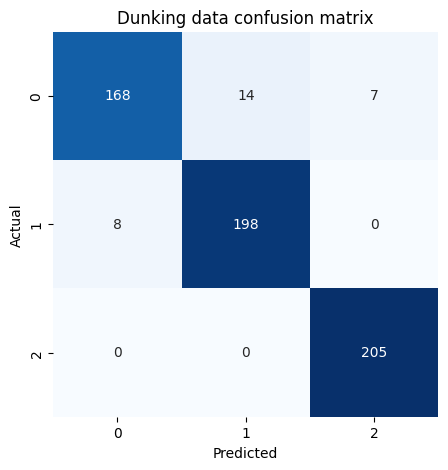

,precision,recall,f1-score,support
0,0.954545,0.888889,0.920548,189.000000
1,0.933962,0.961165,0.947368,206.000000
2,0.966981,1.000000,0.983213,205.000000
accuracy,0.951667,0.951667,0.951667,0.951667
macro avg,0.951830,0.950018,0.950377,600.000000
weighted avg,0.951727,0.951667,0.951167,600.000000


In [78]:
# Calculate r_Washburn values for dunking_data
dunking_data["r_Washburn"] = dunking_data.apply(calc_r_washburn, axis=1)

# Predict biscuit type using the classifier

X = dunking_data[['L','eta','gamma','phi','t','r_Washburn']]
y = dunking_data['biscuit_encoded']

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Fit a Random Forest classifier to the training data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict the biscuit type for the test data
y_pred = clf.predict(X_test)

# Generate the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Dunking data confusion matrix')
plt.show()

report_df

Cross-validated R^2 scores: [0.66468003 0.60127    0.61246308]
############# Evaluation metrics ###############
model: Random Forest Regressor
Test size: 99
Correlation coefficient: 0.8515663839394213
Mean Squared Error: 1.3436753064859448e-14
R^2 Score: 0.7080154194312885
Mean absolute error: 9.137199838093332e-08
Root mean squared error: 1.1591700938541956e-07
Relative absolute error: 0.48640895126171985
Relative root squared error: 0.5403559757869912 



/tmp/ipykernel_51413/2943671671.py:40: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df_no_outliers.plot(ax=axs[0], x='r_RF', y='r_RF_residuals', kind='scatter', color=df_no_outliers["biscuit_encoded"], colormap="viridis")


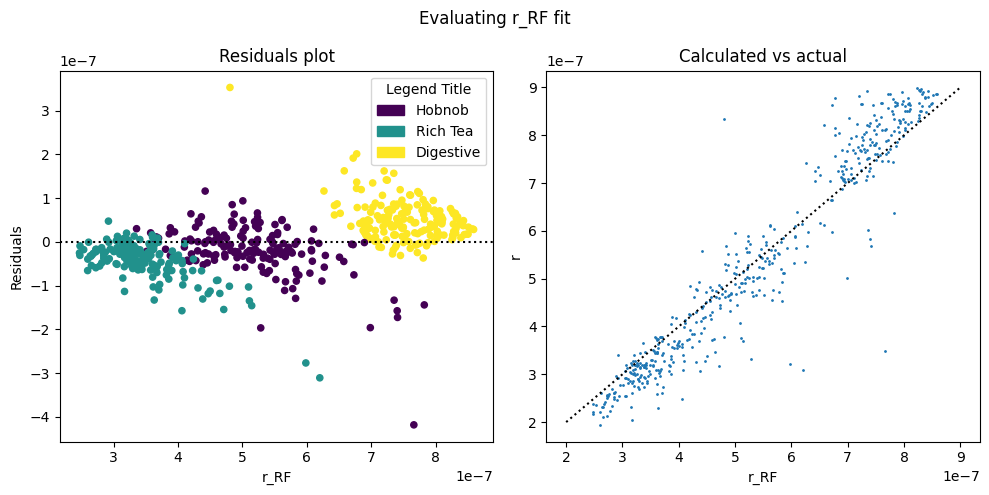

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.034292e-07   5.046703e-08
Hobnob     4.977515e-07  -1.909938e-08
Rich Tea   3.047645e-07  -4.252399e-08


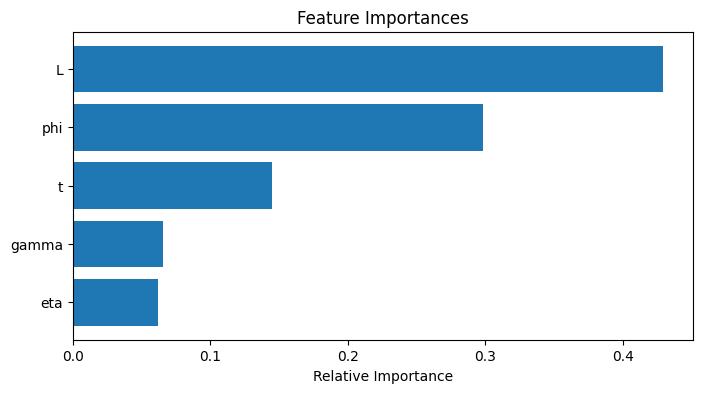

In [79]:
# Can ML predict r better than Washburn equation? 
# We see a clear skew in the residuals of r_Washburn to higher r values

# Fit a Random Forest regressor to the data
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

# Define variables
X = df_no_outliers[['L','eta','gamma','phi','t']]
y = df_no_outliers['r']

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Fit a Random Forest regressor to the training data
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)

# Predict the radius for the test data
y_pred = reg.predict(X_test)

# Calculate the cross-validated R^2 score
cv_scores = cross_val_score(reg, X_train, y_train, cv=3, scoring='r2')
print("Cross-validated R^2 scores:", cv_scores)

# Calculate evaluation metrics
evaluation_metrics("Random Forest Regressor", y_test, y_pred)

# Calculate residuals
df_no_outliers["r_RF"] = reg.predict(stdX)
df_no_outliers["r_RF_residuals"] = df_no_outliers["r"] - df_no_outliers["r_RF"]

# Plot residuals and calc vs empirical
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Plot the residuals
df_no_outliers.plot(ax=axs[0], x='r_RF', y='r_RF_residuals', kind='scatter', color=df_no_outliers["biscuit_encoded"], colormap="viridis")
axs[0].set_xlabel('r_RF')
axs[0].axhline(y=0.0, color='black', linestyle='dotted')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals plot')
# Remove the colorbar
cbar = axs[0].collections[0].colorbar
cbar.remove()

# Create a legend
legend_labels = ['Hobnob', 'Rich Tea', 'Digestive']
colors = plt.cm.viridis(np.linfrom matplotlib.patches import Patchspace(0, 1, len(legend_labels)))
patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
           
axs[0].legend(handles=patches, title='Legend Title')
axs[1].set_title("Calculated vs actual")
df_no_outliers.plot(ax=axs[1], x='r_RF', y='r', kind='scatter', s=1, alpha=1)
# plot x=y
axs[1].plot([0.0000002, 0.0000009], [0.0000002, 0.0000009], color='black', linestyle='dotted')
fig.suptitle("Evaluating r_RF fit")

plt.tight_layout()
plt.show()

# Calculate average residuals and average r by biscuit
average_residuals = df_no_outliers.groupby("biscuit")["r_RF_residuals"].mean()
average_r = df_no_outliers.groupby("biscuit")["r"].mean()

# Combine into a single DataFrame
average_df = pd.DataFrame({'Avg r': average_r, 'Avg Residuals': average_residuals})

print(average_df)

# Plot feature importance

importances = reg.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



Cross-validated R^2 scores: [0.69540876 0.71482012 0.65018292]
############# Evaluation metrics ###############
model: Random Forest Regressor
Test size: 99
Correlation coefficient: 0.8680028867684574
Mean Squared Error: 1.1747873306034827e-14
R^2 Score: 0.7447152713695553
Mean absolute error: 8.290856079903844e-08
Root mean squared error: 1.0838760679171225e-07
Relative absolute error: 0.44135475663728063
Relative root squared error: 0.5052570916181629 



/tmp/ipykernel_51413/672705811.py:46: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df_no_outliers.plot(ax=axs[0], x='r_RF', y='r_RF_residuals', kind='scatter', color=df_no_outliers["biscuit_encoded"], colormap="viridis")


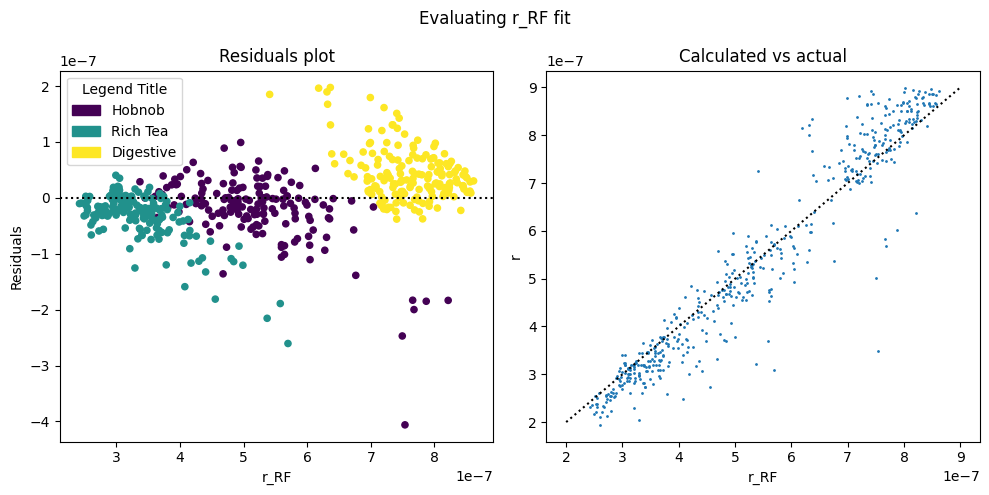

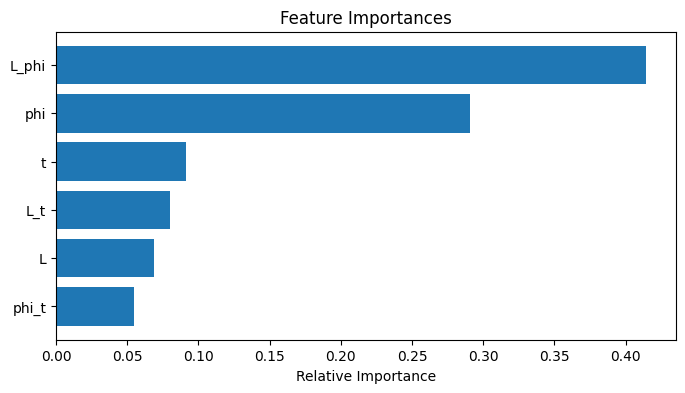

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.034292e-07   4.368102e-08
Hobnob     4.977515e-07  -2.003329e-08
Rich Tea   3.047645e-07  -3.419967e-08


In [80]:
# Define variables
X = df_no_outliers[['L','phi', 't']]
y = df_no_outliers['r']

# Add cross product features
cross_product_features = pd.DataFrame()
for i, feature1 in enumerate(X.columns):
    for feature2 in X.columns[i + 1:]:
        cross_product_feature = feature1 + '_' + feature2
        cross_product_features[cross_product_feature] = X[feature1] * X[feature2]

# Concatenate the original and new DataFrames
X = pd.concat([X, cross_product_features], axis=1)

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Fit a Random Forest regressor to the training data
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)

# Predict the radius for the test data
y_pred = reg.predict(X_test)

# Cross validation 3 splits on training data
from sklearn.model_selection import cross_val_score

# Calculate the cross-validated R^2 score
cv_scores = cross_val_score(reg, X_train, y_train, cv=3, scoring='r2')
print("Cross-validated R^2 scores:", cv_scores)

# Calculate evaluation metrics
evaluation_metrics("Random Forest Regressor", y_test, y_pred)

# Calculate residuals
df_no_outliers["r_RF"] = reg.predict(stdX)
df_no_outliers["r_RF_residuals"] = df_no_outliers["r"] - df_no_outliers["r_RF"]

# Plot residuals and calc vs empirical
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Plot the residuals
df_no_outliers.plot(ax=axs[0], x='r_RF', y='r_RF_residuals', kind='scatter', color=df_no_outliers["biscuit_encoded"], colormap="viridis")
axs[0].set_xlabel('r_RF')
axs[0].axhline(y=0.0, color='black', linestyle='dotted')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals plot')
# Remove the colorbar
cbar = axs[0].collections[0].colorbar
cbar.remove()

# Create a legend
legend_labels = ['Hobnob', 'Rich Tea', 'Digestive']
colors = plt.cm.viridis(np.linspace(0, 1, len(legend_labels)))
patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
axs[0].legend(handles=patches, title='Legend Title')

axs[1].set_title("Calculated vs actual")
df_no_outliers.plot(ax=axs[1], x='r_RF', y='r', kind='scatter', s=1, alpha=1)
# plot x=y
axs[1].plot([0.0000002, 0.0000009], [0.0000002, 0.0000009], color='black', linestyle='dotted')
fig.suptitle("Evaluating r_RF fit")

plt.tight_layout()
plt.show()

# Calculate average residuals and average r by biscuit
average_residuals = df_no_outliers.groupby("biscuit")["r_RF_residuals"].mean()
average_r = df_no_outliers.groupby("biscuit")["r"].mean()

# Combine into a single DataFrame
average_df = pd.DataFrame({'Avg r': average_r, 'Avg Residuals': average_residuals})

# Plot feature importance
importances = reg.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(average_df)

In [157]:
# Analysing different regression models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge as KRR


# Split the data into training and testing sets
X = df_no_outliers[['gamma', 'L', 't', 'phi', 'eta', 'r_Washburn']]
y = df_no_outliers['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for linear regression
linear_pipeline = Pipeline([
    ('linear', LinearRegression())
])

linear_pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

# Create a pipeline for random forest regression
rf_pipeline = Pipeline([
    ('random_forest', RandomForestRegressor())
])

# Create a pipeline for random forest regression
rf_pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor())
])

rf_pipeline_pca = Pipeline([
    ('pca', PCA(n_components=4)),
    ('random_forest', RandomForestRegressor())
])

krr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('kernel', KRR(kernel='poly', degree=3)),
])

# List of pipelines for ease of iteration
pipelines = [linear_pipeline, linear_pipeline_scaled, rf_pipeline, rf_pipeline_scaled, rf_pipeline_pca, krr_pipeline]

# Dictionary of pipelines and regressor types for ease of reference
pipe_dict = {0: 'Linear', 1: 'Linear Scaled', 2: 'Random Forest', 3: 'Random Forest Scaled', 4: 'Random Forest PCA', 5: 'Kernel'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %f' % (pipe_dict[idx], val.score(X_test, y_test)))

Linear pipeline test accuracy: 0.997107
Linear Scaled pipeline test accuracy: 0.997107
Random Forest pipeline test accuracy: 0.908616
Random Forest Scaled pipeline test accuracy: 0.996709
Random Forest PCA pipeline test accuracy: 0.881934
Kernel pipeline test accuracy: 0.996194


In [174]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

def evaluate_pipeline(pipe, model_name, X_train, y_train, X_test, y_test, df_no_outliers):
    # Predict the radius for the test data
    y_pred = pipe.predict(X_test)

    # Calculate the cross-validated R^2 score
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='r2')
    print("Cross-validated R^2 scores:", cv_scores)

    # Calculate evaluation metrics
    evaluation_metrics(model_name, y_test, y_pred)

    # Calculate residuals
    df_test = df_no_outliers.loc[X_test.index]
    df_test["r_RF_PCA"] = y_pred
    df_test["r_RF_PCA_residuals"] = df_test["r"] - df_test["r_RF_PCA"]

    # Plot residuals and calc vs empirical
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    # Plot the residuals
    df_test.plot(ax=axs[0], x='r_RF_PCA', y='r_RF_PCA_residuals', kind='scatter', c=df_test["biscuit_encoded"], colormap="viridis")
    axs[0].set_xlabel('r_RF_PCA')
    axs[0].axhline(y=0.0, color='black', linestyle='dotted')
    axs[0].set_ylabel('Residuals')
    axs[0].set_title('Residuals plot')
    
    # Remove the colorbar
    cbar = axs[0].collections[0].colorbar
    cbar.remove()

    # Create a legend
    legend_labels = ['Hobnob', 'Rich Tea', 'Digestive']
    colors = plt.cm.viridis(np.linspace(0, 1, len(legend_labels)))
    patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
    axs[0].legend(handles=patches, title='Legend Title')

    # Plot calculated vs actual
    axs[1].set_title("Calculated vs actual")
    df_test.plot(ax=axs[1], x='r_RF_PCA', y='r', kind='scatter', s=1, alpha=1)
    
    # plot x=y
    axs[1].plot([0.0000002, 0.0000009], [0.0000002, 0.0000009], color='black', linestyle='dotted')
    fig.suptitle("Evaluating "+model_name+" fit")

    plt.tight_layout()
    plt.show()

    # Calculate average residuals and average r by biscuit
    average_residuals = df_test.groupby("biscuit")["r_RF_PCA_residuals"].mean()
    average_r = df_test.groupby("biscuit")["r"].mean()

    # Combine into a single DataFrame
    average_df = pd.DataFrame({'Avg r': average_r, 'Avg Residuals': average_residuals})
    print(average_df)

    # If pipeline is Random Forest, plot feature importance
    if "Random Forest" in model_name:
        importances = pipe.named_steps['random_forest'].feature_importances_
        features = X.columns
        indices = np.argsort(importances)

        plt.figure(figsize=(8, 4))
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

    return

In [175]:
# Evaluate optimal pipelines
opt = rf_pipeline_scaled

# Split the data into training and testing sets
X = df_no_outliers[['gamma', 'L', 't', 'phi', 'eta', 'r_Washburn']]
y = df_no_outliers['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

evaluate_pipeline(rf_pipeline_scaled, "Random Forest Scaled", X_train, y_train, X_test, y_test, df_no_outliers)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- r_Washburn
Feature names seen at fit time, yet now missing:
- 1/gamma
- 1/t
- L2
- L2/cos_phi
- L2/gamma
- ...


Cross-validated R^2 scores: [0.99608629 0.99627835 0.99655142]
############# Evaluation metrics ###############
model: Random Forest Scaled
Test size: 124
Correlation coefficient: 0.9984437611182555
Mean Squared Error: 1.4774693275889818e-16
R^2 Score: 0.9968509750249893
Mean absolute error: 9.410430542253967e-09
Root mean squared error: 1.2155119611048596e-08
Relative absolute error: 0.048581514963733696
Relative root squared error: 0.05611617391635538 



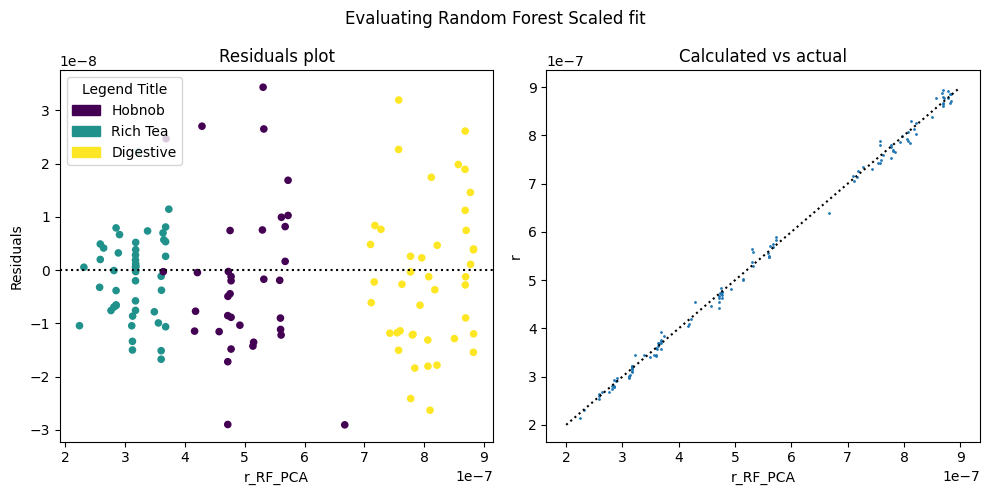

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.061125e-07  -1.365417e-09
Hobnob     4.981081e-07  -1.470105e-09
Rich Tea   3.137429e-07  -1.249177e-09


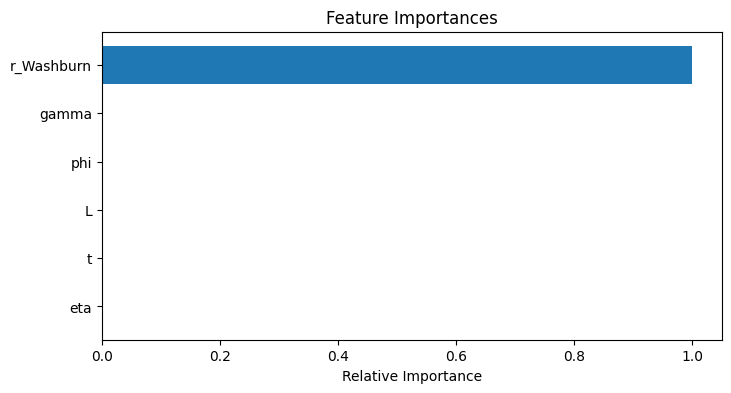

In [176]:
# Split the data into training and testing sets
X = df_no_outliers[['gamma', 'L', 't', 'phi', 'eta', 'r_Washburn']]
y = df_no_outliers['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_pipeline_scaled.fit(X_train, y_train)

evaluate_pipeline(rf_pipeline_scaled, "Random Forest Scaled", X_train, y_train, X_test, y_test, df_no_outliers)

Cross-validated R^2 scores: [0.87929991 0.84966357 0.90890166]
############# Evaluation metrics ###############
model: Random Forest Scaled
Test size: 99
Correlation coefficient: 0.9589547364632358
Mean Squared Error: 4.5260571191714986e-15
R^2 Score: 0.907627693911679
Mean absolute error: 4.677436930535622e-08
Root mean squared error: 6.72759772814301e-08
Relative absolute error: 0.23247601335894005
Relative root squared error: 0.30392812651730844 



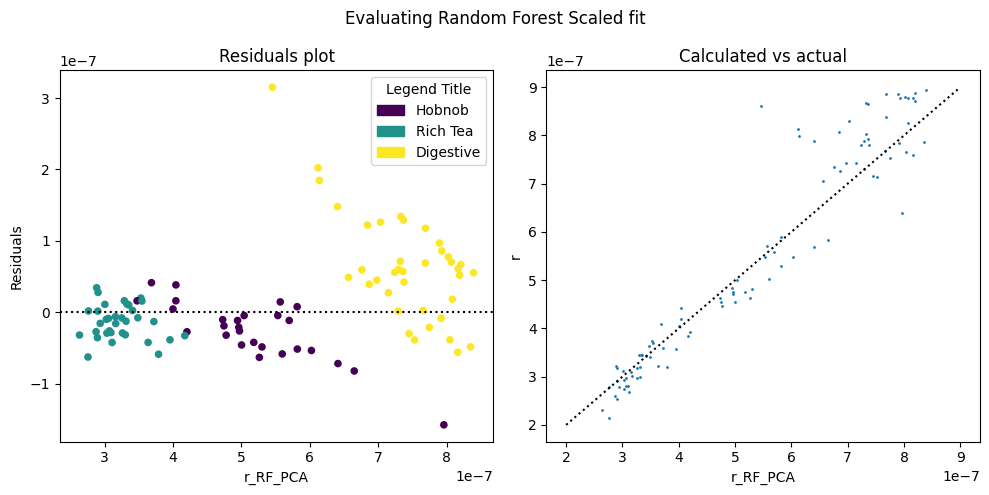

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.054846e-07   6.335437e-08
Hobnob     4.903991e-07  -2.591665e-08
Rich Tea   3.090234e-07  -1.339081e-08


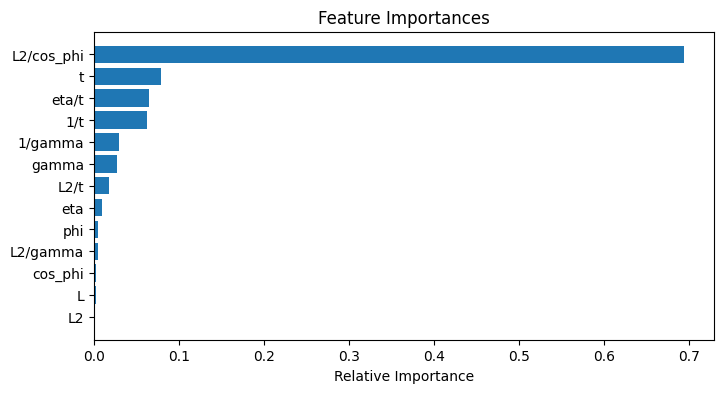

In [177]:
# Create new variables based on Washburn equation 

df_new_vars = df_no_outliers.copy()
df_new_vars['L2'] = df_new_vars['L'] * df_new_vars['L']
df_new_vars['eta/t'] = df_new_vars['eta'] / df_new_vars['t']
df_new_vars['1/t'] = 1/df_new_vars['t']
df_new_vars['cos_phi'] = 1/np.cos(df_new_vars['phi'])
df_new_vars['1/gamma'] = 1/df_new_vars['gamma']
df_new_vars['L2/cos_phi'] = df_new_vars["L2"] / np.cos(df_new_vars["phi"])
df_new_vars['L2/t'] = df_new_vars["L2"] / df_new_vars["t"]
df_new_vars['L2/gamma'] = df_new_vars["L2"] / df_new_vars["gamma"]

# Train optimal model on new variables

# Split the data into training and testing sets
X = df_new_vars[['gamma', 'L', 't', 'phi', 'eta', 'L2', 'eta/t', 'cos_phi', '1/gamma', 'L2/cos_phi', 'L2/t', '1/t', 'L2/gamma']]
y = df_new_vars['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline_scaled.fit(X_train, y_train)

evaluate_pipeline(rf_pipeline_scaled, "Random Forest Scaled", X_train, y_train, X_test, y_test, df_new_vars)

Best hyperparameters: {'alpha': 10, 'coef0': 5, 'degree': 5}
Cross-validated R^2 scores: [0.99681801 0.99773216 0.99742015]
############# Evaluation metrics ###############
model: Kernel Ridge Regression
Test size: 99
Correlation coefficient: 0.9989528142936152
Mean Squared Error: 9.69903228962253e-17
R^2 Score: 0.9978923718689048
Mean absolute error: 7.423150198786982e-09
Root mean squared error: 9.84836650903211e-09
Relative absolute error: 0.039516337250249396
Relative root squared error: 0.045908911238399686 



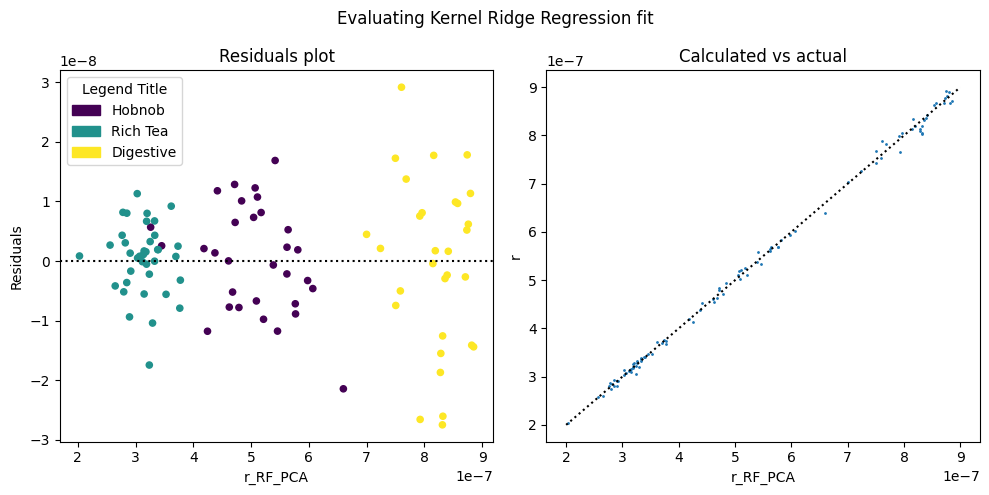

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.182433e-07  -4.232080e-10
Hobnob     5.058430e-07   2.814186e-10
Rich Tea   3.139093e-07   3.582300e-10


In [178]:
# kernel ridge regression between r_Washburn and r

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

# Define variables
X = df_no_outliers[['r_Washburn']]
y = df_no_outliers['r']

stdX = pd.DataFrame(scaler.fit_transform(X), index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Scale the data
stdX_train = scaler.fit_transform(X_train)
stdX_test = scaler.transform(X_test)

stdX_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
stdX_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index)

# Define the model
krr = KernelRidge(kernel='poly')

# Define the hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'degree': [2, 3, 4, 5],
    'coef0': [0.1, 0.5, 1, 5, 10]
}

# Perform a grid search
grid_search = GridSearchCV(krr, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Fit the model with the best hyperparameters
krr = KernelRidge(kernel='poly', **best_params)
krr.fit(X_train, y_train)

# Predict the radius for the test data
y_pred = krr.predict(X_test)

evaluate_pipeline(krr, "Kernel Ridge Regression", X_train, y_train, X_test, y_test, df_no_outliers)

In [186]:
# Apply KRR to dunking data

# Calculate r_washburn
dunking_data["r_Washburn"] = dunking_data.apply(calc_r_washburn, axis=1)

# Define variables
X = dunking_data[['r_Washburn']]
stdX = pd.DataFrame(scaler.fit_transform(X))

# Predict the radius for the data
dunking_data["r_pred"] = krr.predict(stdX)

# Use r_pred for classifier

X = dunking_data[['L','eta','gamma','phi','t','r_pred']]

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

clf_rf.predict(stdX)

# Confusion matrix





array([2, 0, 2, ..., 0, 2, 0])